# Madaline(Coklu Adaptif Dogusal Eleman)

Veri seti, insanların kanser risklerini düşük maliyetle öğrenmelerine ve kanser risk durumlarına göre uygun kararlar almalarına yardımcı olan kanser tahmin sisteminin etkinliğini ölçmek için toplanmış verileri içerir. 

Toplam öznitelik sayısı: 16
Örnek sayısı: 284

Öznitelik bilgileri:

Cinsiyet: Erkek(M), Kadın(F)
Yaş: Hasta yaşları
Sigara kullanımı: EVET=2, HAYIR=1
Sarı parmaklar: EVET=2, HAYIR=1
Anksiyete: EVET=2, HAYIR=1
Akran baskısı: EVET=2, HAYIR=1
Kronik hastalık: EVET=2, HAYIR=1
Yorgunluk: EVET=2, HAYIR=1
Alerji: EVET=2, HAYIR=1
Hırıltı: EVET=2, HAYIR=1
Alkol: EVET=2, HAYIR=1
Öksürük: EVET=2, HAYIR=1
Nefes darlığı: EVET=2, HAYIR=1
Yutma güçlüğü: EVET=2, HAYIR=1
Göğüs ağrısı: EVET=2, HAYIR=1
Akciğer kanseri: EVET, HAYIR
bilgileri bulunmaktadır.

![](https://www.foxchase.org/sites/default/files/Radiation%20Lung%20Cancer%20Blog%20Photo_0.jpg)

## Keşifçi Veri Analizi(EDA)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
# numpy(numerical python)=> bilimsel hesaplamaları yapmayı saglayan kütüphanedir.
# seaborn => verileri görselleştirmek için kullandıgımız kütüphanedir.
#pandas => veri analizi kütüphanesidir.

In [2]:
df = pd.read_csv('/kaggle/input/lung-cancer/survey lung cancer.csv')


In [3]:
df.head() #veri çerçevimizin ilk 5 gözlemini görüntüleyelim.

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
df.shape #Veri çerçevesinin kaç öznitelik ve kaç gözlemden oluştuğunu görüntüler

(309, 16)

In [5]:
df.info() 
# burada veri setinin yapisal bilgilerini ogrenmek icin info fonk. kullanildi.
# Her bir değişkenimizin kaçar adet olduğunu,değişkenlerin tipini ve bellek kullanımını görüntüledik.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [6]:
df.corr()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
AGE,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104
SMOKING,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117
YELLOW_FINGERS,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829
ANXIETY,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634
PEER_PRESSURE,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828
CHRONIC DISEASE,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938
FATIGUE,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832
ALLERGY,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433
WHEEZING,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640
ALCOHOL CONSUMING,0.058985,-0.050623,-0.289025,-0.165750,-0.159973,0.002150,-0.191377,0.344339,0.265659,1.000000,0.202720,-0.179416,-0.009294,0.331226


In [7]:
 # korelasyon => iki degişken arasındaki ilişki yönü ve derecesi bulunabilir.
 # -1 < korelasyon katsayısı < 1
 # 0 'a yaklaşması zayıf ilişkinin varlıgını gösterir.Değişkenlerin aynı yönde (+) artıp azaldığını ya da zıt yönlerde (-) artış ve azalış gösterdiğini belirtir. 
#Değişkenler birlikte artıyor veya azalıyorsa pozitif yönde, değişkenlerden biri artarken diğeri azalıyorsa ise negatif yönde bir ilişki vardır.
#  Korelasyon matrisine baktıgımızda en güçlü pozitif ilişki 0.57  anxıety ile yellow_Finger arasındadır.

<AxesSubplot:>

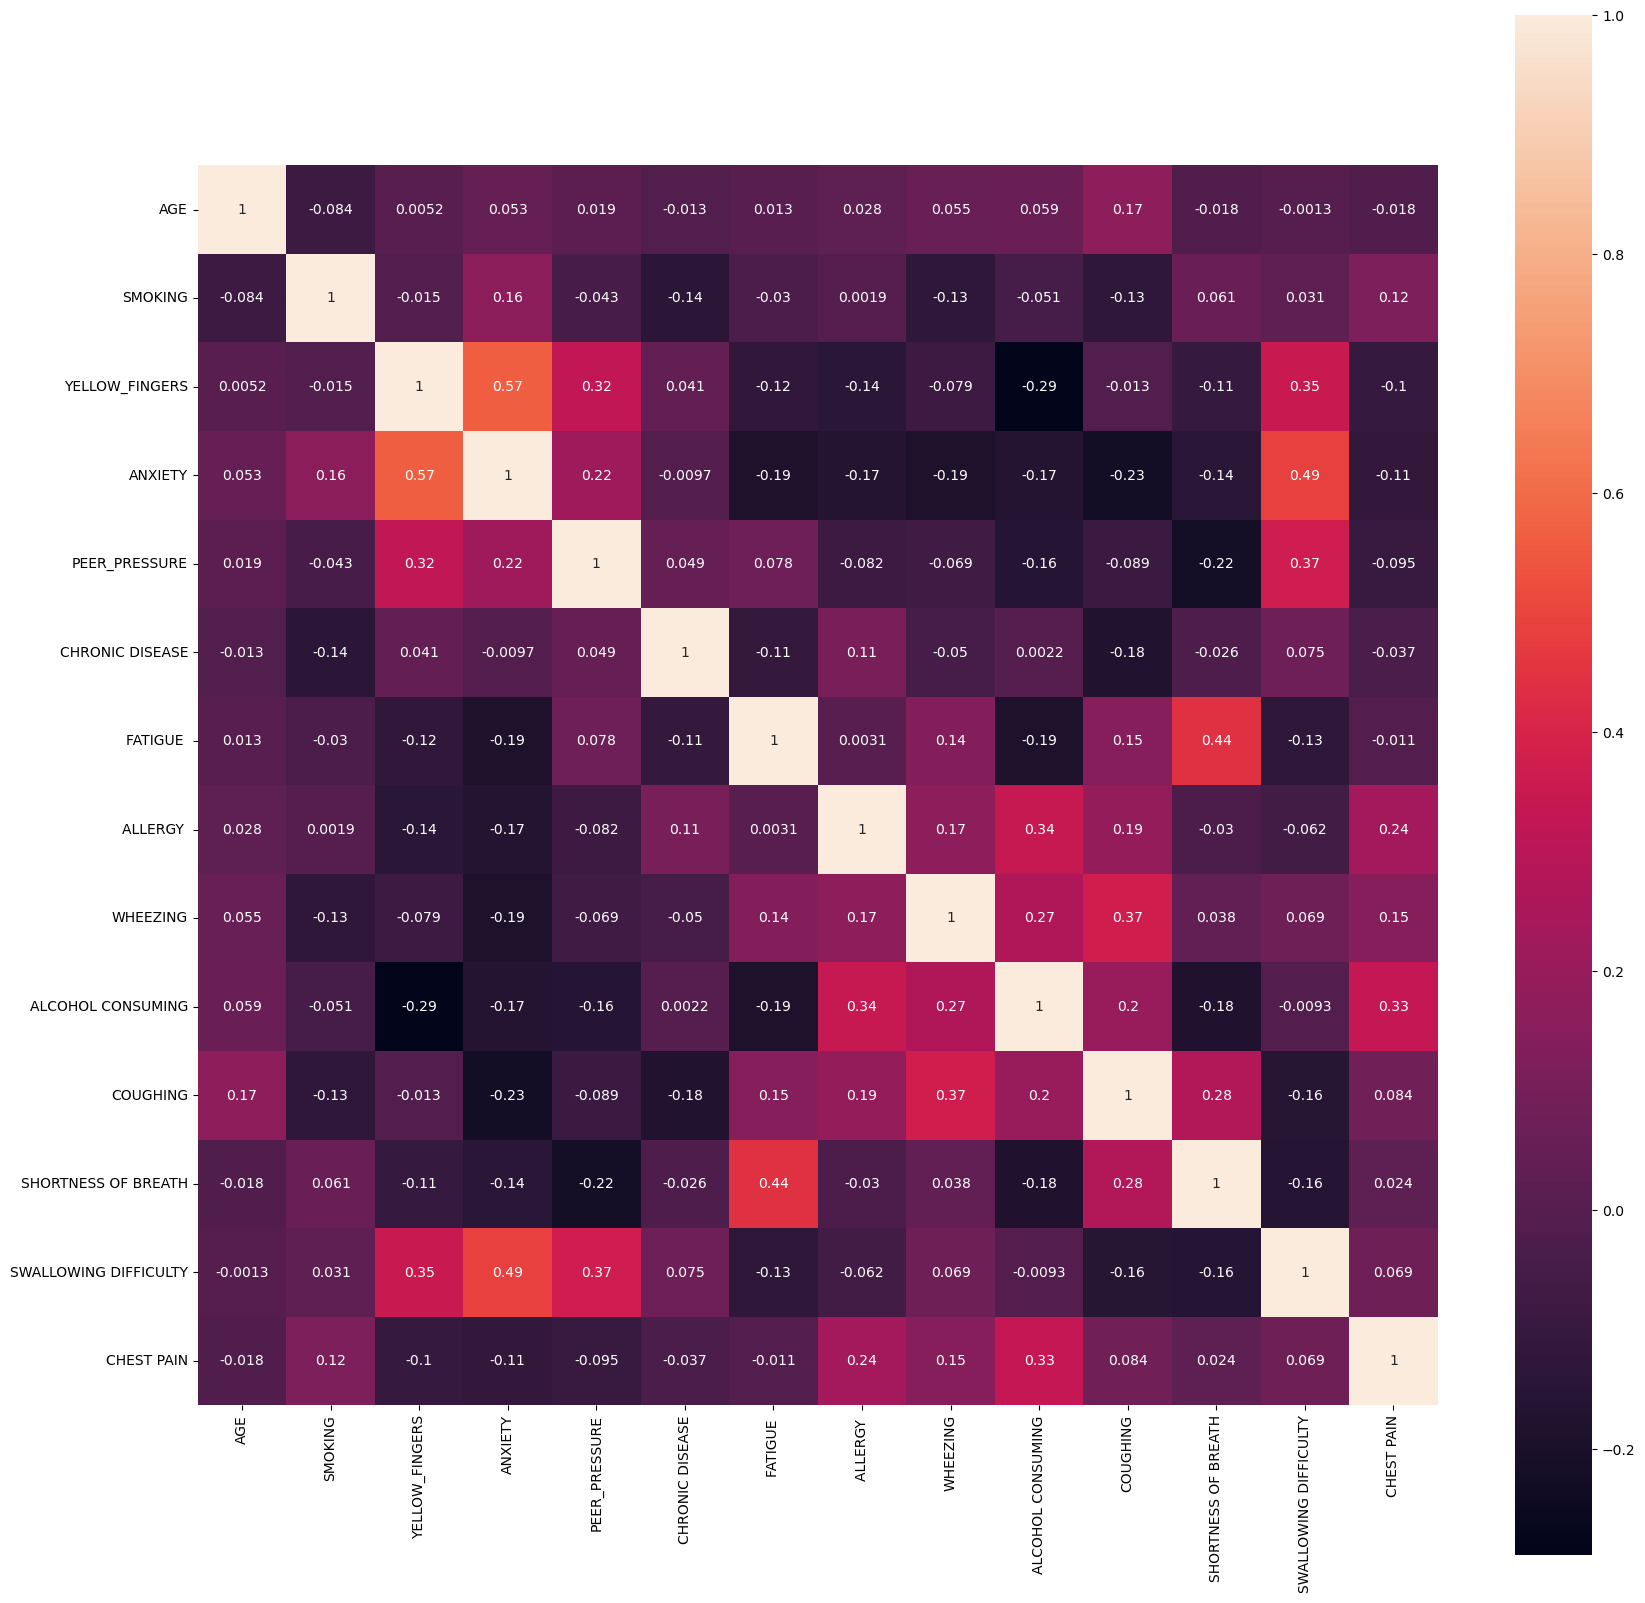

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(20,20)
sns.heatmap(df.corr(), square = True, annot = True)

In [9]:
#ısı haritasına baktıgımızda negatif yonlü ilişkinin şiddeti arttıkça rengin koyulaştıgını söyleyebilirz.
#pozitif yonlu ilişkinin şiddeti arttıkça rengin krem rengine dogru açıldıgını görüyoruz.

In [10]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [11]:
len(df[df['LUNG_CANCER']=='YES'])

270

## Veri Ön İşleme

In [12]:
#Özniteliklerimizi tekrar gözlemleyelim.
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [13]:
#Eksik değerleri tekrar gözlemleyelim.
df.isnull().sum() 

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

One-Hot Encoding

Veri setindeki kategorik değerlerini sayısallaştırma işlemini gerçekleştiricez.
*  0-1 şeklinde sayısallaştırabiliriz.



In [14]:
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace(['NO', 'YES'], [0, 1])
df['LUNG_CANCER'].unique()

array([1, 0])

In [15]:
df['GENDER'] = df['GENDER'].replace(['F', 'M'], [0, 1])
df['GENDER'].unique()
#Cinsiyet özelliğindeki etiket, Kadın için 0 ve Erkek için 1 olarak değiştirildi.

array([1, 0])

In [16]:
df.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,0.524272,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,0.873786
std,0.500221,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.332629
min,0.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,1.000000,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,1.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [17]:
for column in df.columns[2:]:
    df[column] = df[column].replace([1, 2], [0, 1])
#Diğer ikili özelliklerin değerini Yanlış için 0 (başlangıçta 1) ve Doğru için 1 (başlangıçta 2) olarak değiştirir


In [18]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,0
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,0
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [19]:
X=df.drop(['LUNG_CANCER'],axis=1)
y=df['LUNG_CANCER']

Neden train_test_split kullanıyoruz ?
* %75 train,%25 test olarak bölütledik.eğitim için kullanılan modeli test etmek için aynı verileri kullanırsak,daha iyi performans saglanacaktır.Ancak bu çok iyi değildir,fazla uyum sorunlarına yol açacaktır.Yani model verileri ezberler ve veri saglamayacaktır.Görünmeyen veriler içinde dogru sonuçlar verebilir.
* Verinin %75 kısımını egitim için, test için ise %25'lik kısmını kullanacağız.


![](https://www.researchgate.net/profile/Brian-Mwandau/publication/325870973/figure/fig6/AS:639531594285060@1529487622235/Train-Test-Data-Split.png)

In [20]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [21]:
X_train

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
140,0,47,1,1,0,1,1,1,1,1,0,1,1,0,0
208,1,67,0,1,1,1,0,1,1,0,0,1,0,1,0
277,0,87,0,0,0,0,1,1,0,0,0,0,1,0,0
203,0,65,0,1,1,1,1,0,1,1,1,1,1,1,0
144,1,64,0,1,1,1,0,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,1,65,1,1,1,1,1,0,0,0,0,0,0,0,0
71,0,66,1,1,1,1,0,1,0,1,0,1,1,1,0
106,0,61,1,1,1,1,1,1,0,0,0,0,1,1,0
270,0,70,1,0,0,0,0,1,0,0,0,0,1,0,0


In [22]:
X_test

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
288,0,61,0,1,1,1,0,0,1,1,0,1,0,1,0
9,1,53,1,1,1,1,1,0,1,0,1,0,0,1,1
57,1,73,0,0,0,0,1,0,1,0,1,1,1,1,1
60,1,70,0,1,0,1,1,1,1,1,1,1,0,1,1
25,1,65,0,1,1,0,0,1,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,0,57,1,1,0,0,0,0,0,0,0,0,1,0,0
22,0,21,1,0,0,0,1,1,1,0,0,0,1,0,0
262,0,67,0,1,0,0,0,0,0,1,0,1,1,0,0
56,0,63,0,1,0,1,0,1,0,0,0,1,1,0,1


In [23]:
y_train

140    0
208    0
277    0
203    0
144    0
      ..
188    0
71     0
106    0
270    0
102    0
Name: LUNG_CANCER, Length: 231, dtype: int64

In [24]:
y_test

288    0
9      0
57     0
60     0
25     0
      ..
30     0
22     0
262    0
56     0
148    0
Name: LUNG_CANCER, Length: 78, dtype: int64

verilerimiz kaç gözlemden oluşuyor ona bakalım.

In [25]:
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (231, 15)
Test shape: (78, 15)


## Model kurma


In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [27]:
def degerlendirme(a,b):

  print('Confusion Matrix:')
  print(confusion_matrix(a,b))

  print('\nAccuracy Score:')
  accuracy = accuracy_score(a,b)
  print(accuracy)

  print('\nClassification Report:')
  print(classification_report(a,b))

  display = ConfusionMatrixDisplay(confusion_matrix(a,b))
  display.plot()

In [28]:
def aktivasi(x):
  if x < 0:
    return -1
  else:
    return 1 

def train(train_data, train_target, alpha=0.1, max_epoch=10):
    w = np.random.random((train_data.shape[1], 2))
    v = np.array([0.5, 0.5])
    b = np.random.random(2)
    b = np.append(b, 0.5)
    epoch = 0
    v_aktivasi = np.vectorize(aktivasi)
    weight_updated = True
    while weight_updated == True and epoch < max_epoch:
        weight_updated = False
        for data, target in zip(train_data, train_target):
            z_in = np.dot(data, w)
            z_in = z_in + b[:-1]
            z = v_aktivasi(z_in)
            y_in = np.dot(z, v) + b[-1]
            y = v_aktivasi(y_in)
            if y != target:
                weight_updated = True
                if target == 1:
                    index = np.argmin(np.abs(z_in))
                    b[index] = b[index] + alpha * (1 - z_in[index])
                    w[:, index] = w[:, index] + alpha * (1 - z_in[index]) * data
                elif target == -1:
                    index = np.where(z_in > 0)[0]
                    if len(index) == 1:
                        index = index[0]
                    b[index] = b[index] + alpha * (-1 - z_in[index])
                    w[:, index] = w[:, index] + alpha * (-1 - z_in[index]) * data[index]
        epoch = epoch + 1
    return (w, v, b)

In [29]:
def test(w, v, b, test_data):
    v_aktivasi = np.vectorize(aktivasi)
    z_in = np.dot(test_data, w)
    z_in = z_in + b[:-1]
    z = v_aktivasi(z_in)
    y_in = np.dot(z, v) + b[-1]
    y = v_aktivasi(y_in)
    return y

In [30]:
m_target = y_train.map(lambda x: -1 if x == 0 else 1).to_numpy()
(w,v,b) = train(X_train,m_target,alpha=0.01,max_epoch=1000)
m_output_bip = test(w,v,b,X_test)
m_output = (m_output_bip + 1)//2
     

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U6'), dtype('<U32')) -> None

In [ ]:

degerlendirme(m_output,y_test.to_numpy())